In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anfagudelogo-tpt/datasets/refs/heads/main/car_price_dataset.csv')

In [3]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Limpia el dataset aplicando las siguientes transformaciones:
    1. Elimina filas con valores vacíos en la columna 'Brand'.
    2. Elimina filas duplicadas.
    3. Convierte los nombres de las columnas a minúsculas en formato snake_case.
    :param df: DataFrame de Pandas con los datos de vehículos.
    :return: DataFrame limpio.
    """
    # Eliminar valores vacíos en la columna 'Brand'
    df = df.dropna(subset=["Brand"])
    # Eliminar filas duplicadas
    df = df.drop_duplicates()
    # Convertir nombres de columnas a snake_case
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

In [8]:
df_clean = clean_data(df)

In [9]:
def plot_price_distribution(df: pd.DataFrame):
    """
    Genera un histograma que muestra la distribución de precios de los vehículos.
    :param df: DataFrame con los datos de vehículos.
    :return: Figura de Matplotlib con el gráfico generado.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df["price"], bins=30, kde=True, color="blue", ax=ax)
    ax.set_xlabel("Precio")
    ax.set_ylabel("Frecuencia")
    ax.set_title("Distribución de Precios de los Vehículos")
    ax.grid()
    return fig

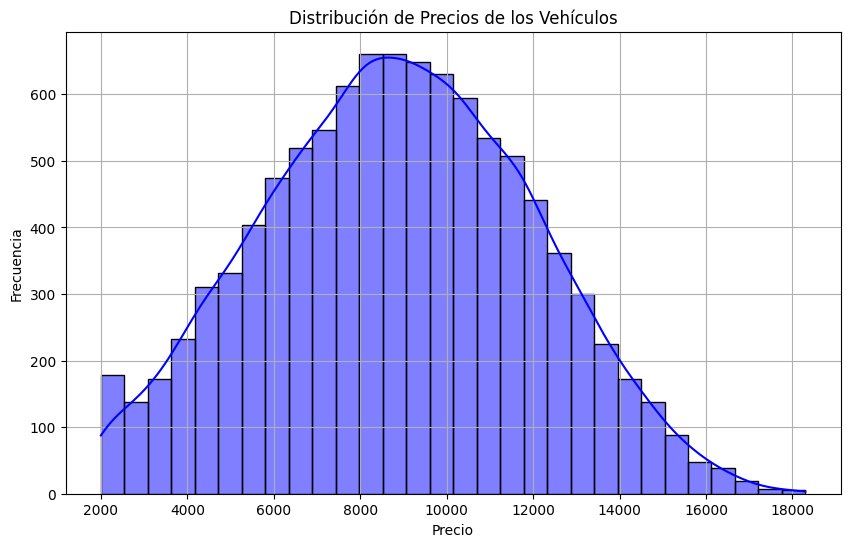

In [13]:
fig_1 = plot_price_distribution(df_clean)

In [14]:
def plot_fuel_type_count(df: pd.DataFrame):
    """
    Genera un gráfico de barras que muestra la cantidad de vehículos por tipo de combustible.
    :param df: DataFrame con los datos de vehículos.
    :return: Figura de Matplotlib con el gráfico generado.
    """
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.countplot(x=df["fuel_type"], palette="viridis", ax=ax)
    ax.set_xlabel("Tipo de Combustible")
    ax.set_ylabel("Cantidad de Vehículos")
    ax.set_title("Cantidad de Vehículos por Tipo de Combustible")
    ax.grid()
    return fig

C:\Users\PGEV\AppData\Local\Temp\ipykernel_49576\2562017157.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["fuel_type"], palette="viridis", ax=ax)


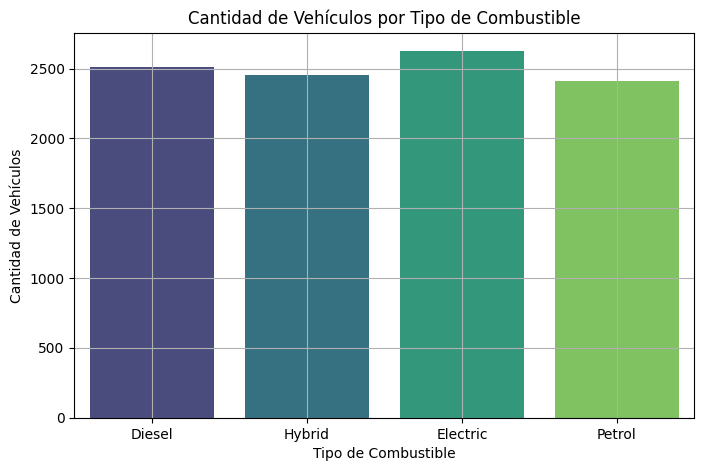

In [15]:
fig_2 = plot_fuel_type_count(df_clean)